#### Data Science - Coursework 2 (50%)
# What caused this gravitational wave signal?
## Deadline Friday week 11, 2pm.

#### Instructions

This coursework assesses learning outcomes from **all Chapters** of the course, but in particular **Chapters 6, 7, 8 and 9**. It is worth 50% of the module. Please ensure you have read the [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Science-2024/blob/master/blended_exercises/Chapter8/Chapter8.ipynb) before starting this coursework.

**These assessments are equivalent to an exam**:
- Submit your work via Turn-It-In on Learning Central. Note that you will need to upload your final notebook exported as a PDF file. **Don't forget to click `run all` before you export it**. You can constantly update this document until the deadline.
- The breakdown of the assessment criteria is provided in Learning Central under Assessment.
- Don't worry about how your code looks - marks are not given for pretty code, but rather for the approach used in solving the problem, your reasoning, explanation and answer.
- It is estimated that the workload required for this CA is approximately 30-35 hours.

<div class="alert-info">
Please also take note of the University’s policy on plagiarism, which is outlined in your student handbook.
 </div>

Plagiarism is the act of passing off the words or ideas of others as if your own. Advice on avoiding plagiarism is given in the UG Student Handbook. There is also considerable help and advice on Learning Central and the University web site. Students need to be especially careful of plagiarism in computing tasks and you are advised not to share code through electronic means. Students working together during their weekly exercises and the coursework is great (and indeed encouraged) but need to ensure that they are not using each other's code or text.

This coursework will be submitted via Learning Central's Turnitin which automatically checks for plagiarism.

#### Tips


- Explain all your reasoning for each step. A *significant fraction* of the marks are given for explanations and discussion, as they evidence understanding of the analysis.  
- Some of these steps will take a while to run and compile. It's a good idea to add in print statements to your code throughout eg `print('this step is done')` to make sure that your bit of code has finished.
- Add the import packages statements at the top of your Jupyter notebook. We will use the `pandas` package to read in the data, with eg `dataIn=pd.read_csv('filename.csv')`.
- You may need to do some additional research into this subject. You will find it useful to look at the following publication from the LIGO consortium. https://arxiv.org/pdf/1608.01940.pdf

***

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part A - Some background [15 marks]

**Answer:**

How do astronomers know that the gravitational waves from the GW150914 event were due to two black holes merging?

The LIGO and VIRGO team produced a plot of spacetime strain (deltaL/L) over time (s) for the Gravitational wave event in 2015. This wave was then used as the true data with which we could compare model wave data called templates. The templates can be scaled in amplitude and phase with Mass (M) and Distance (D) with 2 known equations.

$t_{ref} = (\frac{M_{ref}}{M_*})t$

and

$h(t,M,D) = \frac{M}{M_{ref}} \frac{D_{ref}}{D} h(t_{ref})$

After scaling the wave fit can be measured with a test like Chi^2 or a Bayesian likelihood. When the waves matched they had a combined mass of \~65 solar masses. Utilizing Bayesian inference they concluded the 2 objects had individual masses of 35 and 33 +-\~5 Solar mass with a distance of 440 +-\~150Mpc.

Given the period of the wave (2 waves for every orbit of the pair) it was deduced that the 2 were orbiting just a few Schwarzschild radii from each other just before merger. Meaning they had to have small physical radii to not already have merged. And such massive tiny objects are the very definition of blackholes.


Describe the different parts of the waveform produced due to gravitational waves from a merging black hole event.

Gravitational waves from compact binary inspiraling and merging stars with the inspiral stage. The 2 objects are orbiting and losng energy via gravitational waves, as the wave period is double the orbital period this starts as a super low frequencey signal that takes hundreds to thousands of years to climb to the frequency range the LIGO can detect.

Infall lasts until the merger phase, this is the point of highest amplitude in the strain graph and lasts for only a fraction of a second.

Next is the ring down phase, where the gravitational wave decays.

And while not part of the gravity wave itself, I would like to include the noise dominated phase of the waveform, due to many factors in the laser, mirrors and enviroment, that remains after the ringdown.

The file gravitationalwaveevents.csv contains the properties of previously observed gravitational waves.
Plot the total mass (given in solar masses, 1M⊙ = 1.99×10^30 kg) of the merging sources against their distance (given in units of Mpc, 1 pc = 3 × 10^16m).

Loading the data from GravitationalWaveEvents.csv and displaying headers and first few entries to ensure correct loading and inspect data.

In [39]:
#Load and show data
GravWavDat=pd.read_csv('/content/gravitationalwaveevents.csv')
print(GravWavDat.head())

       DL  DL_err  Mtot  Mtot_err  Mchirp  Mchirp_err detType
0   430.0   170.0  63.1       3.0    28.6        -1.5      GW
1  1060.0   480.0  35.7       3.8    15.2        -1.1      GW
2   440.0   190.0  20.5       1.5     8.9        -0.3      GW
3   960.0   410.0  49.1       3.9    21.5        -1.7      GW
4   320.0   110.0  17.8       0.7     7.9        -0.2      GW


Having seen that luminosity distance and total mass both have error values I will use matplotlib.plot.errorbar to show all the informaton we have.

Text(0.5, 1.0, 'Gravitational Wave Data: Luminosity Distance vs Total Mass')

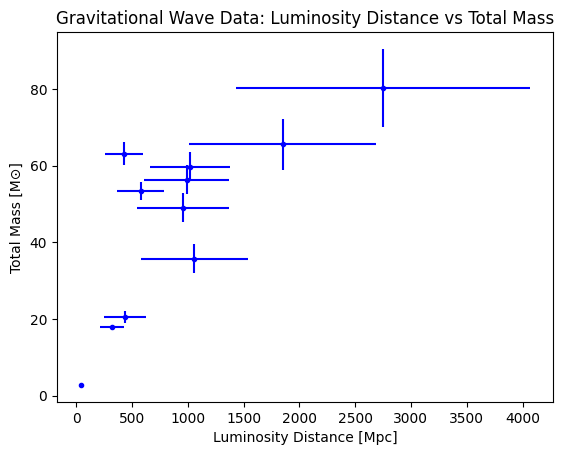

In [40]:
#plot Mass vs Distance, with errors
plt.errorbar(GravWavDat['DL'],GravWavDat['Mtot'],GravWavDat['Mtot_err'],GravWavDat['DL_err'],'b.')
plt.xlabel('Luminosity Distance [Mpc]')
plt.ylabel('Total Mass [M⊙]')
plt.title('Gravitational Wave Data: Luminosity Distance vs Total Mass')

I have noticed a potential trend in the data, I belive there to be a positive correlation between mass and distance.
But I cannot just go from visual aproximations. I have been taught tools to test for this.

In [41]:
from scipy.stats import spearmanr

eventsR, eventsP = spearmanr(GravWavDat['Mtot'], GravWavDat['DL'])

print(f"Spearman's correlation coefficient: {eventsR:.3f}")
print(f"P-value: {eventsP:.3f}")

Spearman's correlation coefficient: 0.709
P-value: 0.015


The spearmans correlation coefficent of 0.71 is interpreted as a strong positive correlation between mass and distance. With a P-Value of 0.015, which falls comfortably under the accepted threshold of 0.05, I am confident to say this.

The corelation is easily explained by thinking about the nature of the detectors, the rarity of these events and the nature of 3d space around us.

Gravitational wave amplitude decreases with distance as 1/r, which limits our ability to detect low-mass systems at large distances. Similarly, the apparent lack of high-mass binaries at close distances reflects their intrinsic rarity, with detections typically occurring at larger distances due to the increased observational volume. The chances of detecting such systems grow with r^3, as the observable volume expands.

I have noticed the errors and regret that the built in spearman function for scipy does not offer a weighted version. It should be possiable to construct a weighted version but as this is a side curiosity rather than question requirement I shall leave it as an exercise for the marker.

***

## Part B - The data [15 marks]

**Answer:**

The plan for part **B.1** is to read the waveform Observedwaveform.csv to a pandas dataframe. We can then plot to visualy determain the minimum and maximum time of the event. The approximate location of the amplitude maxima. And estmate the expected noise in the post ring down "silence"


Strain mean 0.00


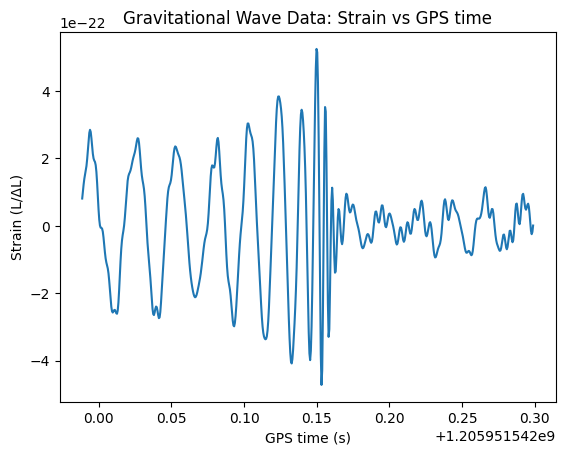

In [42]:
'''Read in the data table for GW event'''

ObsGravWav=pd.read_csv('/content/Observedwaveform.csv')
# print(ObsGravWav.head())


'''plot to inspect current state of data'''

plt.plot(ObsGravWav['time (s)'],ObsGravWav['strain'])
plt.xlabel('GPS time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Gravitational Wave Data: Strain vs GPS time')

print(f"Strain mean {ObsGravWav['strain'].mean():.2f}")


A strain mean of 0 shows no unexpected bias in the data. Waves are symetrical and a mean of 0 gives evidence of the data set also being symetrical.



---



For Part **B.2** we are given the GPStime of the merger.

To match with the model data, the observation times will need to be altered so that the merger occurs at time = 0 secs.

This is achived by subtracting the GPS time from every element in the 'time' array. The output is then stored in a new array 'merge time' leaving the old 'GPS time' in place so we can return to GPS time if we are required to.

Text(0.5, 1.0, 'Gravitational Wave Data: Strain vs Merger time')

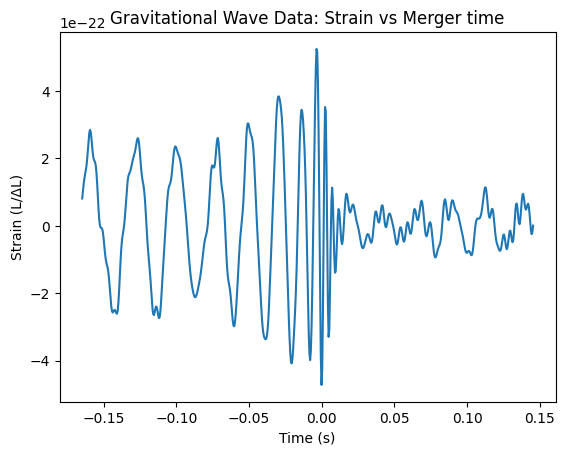

In [43]:
'''Make variable for merger time and take this away from merge data to have merge at t=0, make new field in data for this time'''
GPSMergeTime = 1205951542.153363

ObsGravWav['mergeTime'] = ObsGravWav['time (s)'] - GPSMergeTime

plt.plot(ObsGravWav['mergeTime'],ObsGravWav['strain'])
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Gravitational Wave Data: Strain vs Merger time')

This plot handily shows that the wave form has not been changed in the transformation at all, just the time coordinate

In Part **B.3** we are asked to estimate the average noise and its standard deviation in our data. This will be used ater in our likelihood function.

We start by trying to isolate the merge free data after the event, i.e time >0. If there is no active merger then there should only be noise found in the data.

Text(0.5, 1.0, 'Gravitational Wave Data: RingDown And Noise')

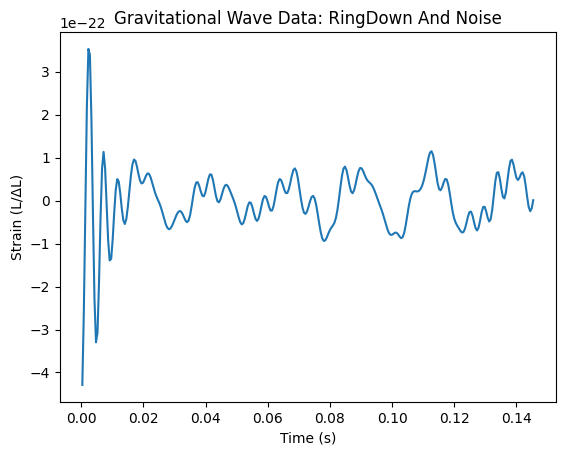

In [44]:
'''To estimate noise, truncate data to only have t>0
Merger is now finsihed we should only have noise in data'''
#chat gpt help to select the entires corrosponding to t>0 from the pandas data frame

positive_time_values = ObsGravWav.loc[ObsGravWav['mergeTime'] > 0, ['mergeTime', 'strain']]

# print(positive_time_values)

plt.plot(positive_time_values['mergeTime'],positive_time_values['strain'])
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Gravitational Wave Data: RingDown And Noise')

This approach of taking the data with merge time >0 visably leaves some of the merger event ring down in the data. The "Smooth" decaying sine wave from $t = 0s$ to $t ≈ 0.015s$

We can remove this by altering the time we wish to take the data from 0s to 0.015s.

Text(0.5, 1.0, 'Gravitational Wave Data: Noise Profile')

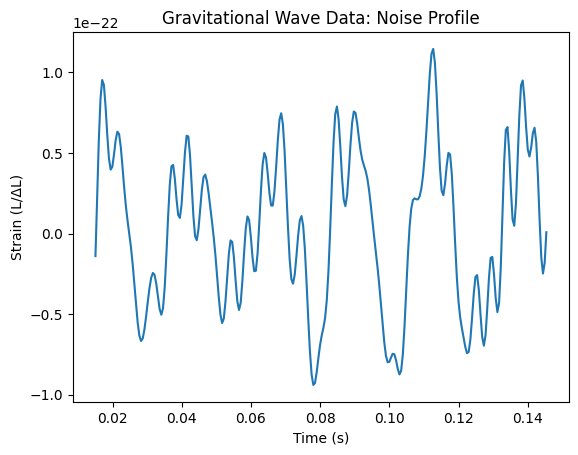

In [45]:
#new lower bound on time

positive_time_values_2 = ObsGravWav.loc[ObsGravWav['mergeTime'] > 0.015, ['mergeTime', 'strain']]

plt.plot(positive_time_values_2['mergeTime'],positive_time_values_2['strain'])
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Gravitational Wave Data: Noise Profile')

This data look much more uniformly 'noisy' without an obvious behaviour.
With data validity considered we can take the mean and standard deviation of the signal free noise region.

In [46]:
#using pandas built in functions we can get the mean and standard deviation
noiseMean = positive_time_values_2['strain'].mean()
noiseStd = positive_time_values_2['strain'].std()

print(f"The mean of our noise is {noiseMean:.3e} with StdDev {noiseStd:.3e}")

The mean of our noise is 3.696e-24 with StdDev 4.858e-23


The noise has a mean value off of 0, I would of expected it to be zero in this case.. but maybe this is a small selection size effect, but the noise is 2 orders of magnitude smaller then out signal so I deem this acceptable.

To state our result for part **B.3** the mean of our noise is 3.696e-24 with StdDev 4.858e-23


***

## Part C - Interpolate reference model to match the observed data time sampling [15 marks]

Here in part **C.1** I will load the mock data to a pandas Data frame.
The first few lines are printed to inform me as to what names are used as coloum headers and let me check that there are no obvious data errors.

Then plot the data to inspect that we have identifiable merger and ringdown and that the merger takes place at t=0.

And finally store and print the smallest value in the time arrays, and print as output.

         strain  time (s)
0  1.545156e-19 -0.164658
1  1.171263e-19 -0.164170
2  1.082966e-19 -0.163681
3  1.389174e-19 -0.163193
4  2.190045e-19 -0.162704
The minimum time in this data set is -0.16466


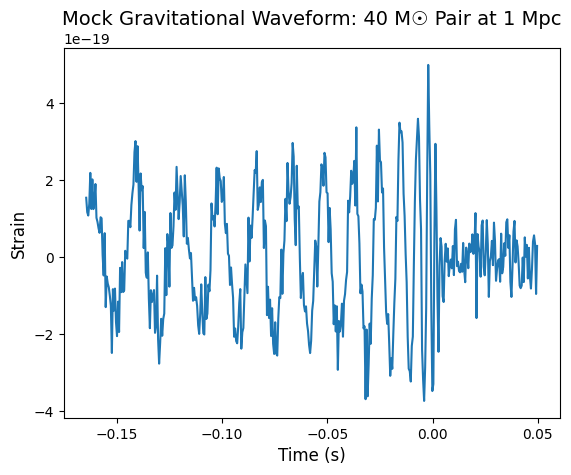

In [47]:
mock40M1D=pd.read_csv('/content/mockdata_waveform_40Msun_1Mpc.csv')
print(mock40M1D.head())

plt.plot(mock40M1D['time (s)'],mock40M1D['strain'])
plt.title('Mock Gravitational Waveform: 40 M☉ Pair at 1 Mpc', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Strain', fontsize=12)

mock40M1Dtmin = mock40M1D['time (s)'].min()
print(f"The minimum time in this data set is {mock40M1Dtmin:.5f}") #5 digits chosen as we do not see variability before the 4th

The minimum time in our mock data set is $t = -0.16466$

Now we need to trim the Observed wave form to match these time constraints $(t_{min} < t < 0 )$ and plot the data in line with the question requirements

Text(0, 0.5, 'Strain')

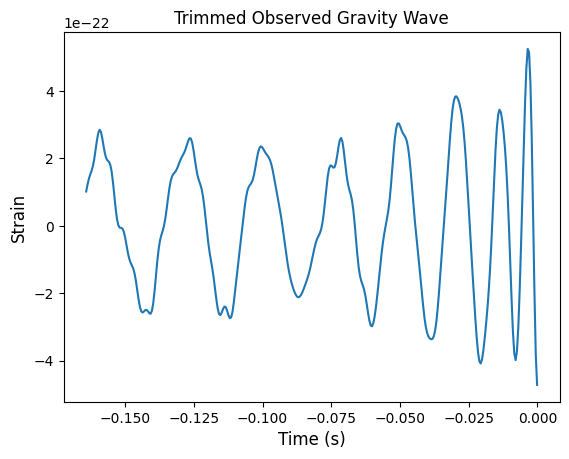

In [48]:
trimmedObsWav = ObsGravWav.loc[(ObsGravWav['mergeTime'] > mock40M1Dtmin) & (ObsGravWav['mergeTime'] < 0), ['strain', 'mergeTime']]


plt.plot(trimmedObsWav['mergeTime'],trimmedObsWav['strain'])
plt.title('Trimmed Observed Gravity Wave')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Strain', fontsize=12)

For Part **C.2** we need to read in the $40M_\odot$ referance wave. The usual checks of header data are performed.

In [49]:
''' Pandas builtin read_csv is exactly what I need here'''
refWave = pd.read_csv('/content/reference_waveform_40Msun_1Mpc.csv')
print(refWave.head())

         strain   time (s)
0 -6.162294e-20 -11.946102
1 -6.140841e-20 -11.945614
2 -6.113607e-20 -11.945126
3 -6.080617e-20 -11.944637
4 -6.041902e-20 -11.944149


With header names and expected values in mind, we can plot the data to see what we are starting with.

Text(0, 0.5, 'Strain')

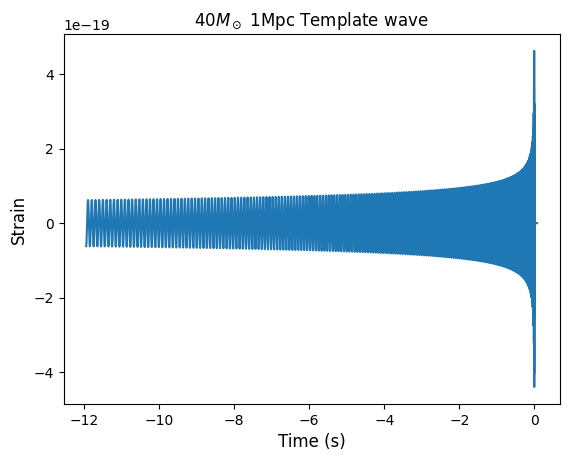

In [50]:
plt.plot(refWave['time (s)'],refWave['strain'])
plt.title(r'40$M_\odot$ 1Mpc Template wave')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Strain', fontsize=12)

Plotting the entire wave shows the need to interpolate, not just for matching x vales for comparison but also as the referance wave is sooooooo long. 12 seconds compared to our sub second observed wave data.

To perform the interpolation, I will use the suggested code from the question statment. This will take our referance wave and modle a mathematical function on it, so when we provide new times or x values it will provide strains that match the new times but follow the 'shape' of the old strain.

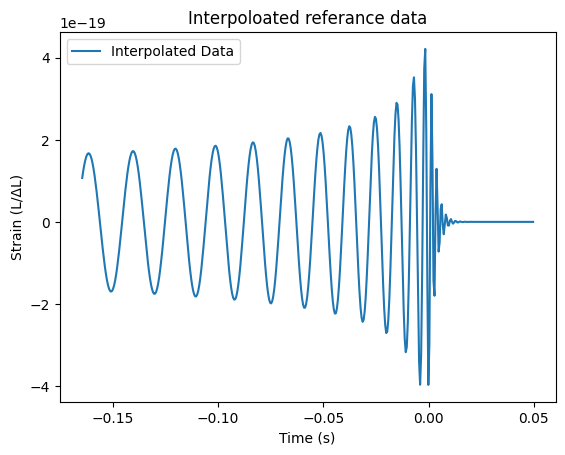

In [51]:
'''
Interpolation code from Project statement
'''
from scipy.interpolate import interp1d
# get interpolation object using a reference waveform with ref_x (time) and ref_y (strain).
interp_fn = interp1d(refWave['time (s)'],refWave['strain'],bounds_error=False)
# now interpolate the data waveform
interp_strain = interp_fn(mock40M1D['time (s)'])
# plot
plt.plot(mock40M1D['time (s)'],interp_strain, label = "Interpolated Data")
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Interpoloated referance data')
plt.legend()


This data looks great to my eye, but to confirm we will overlay the 2 data sets (The interpolated reference wave and the mock data) to confirm.

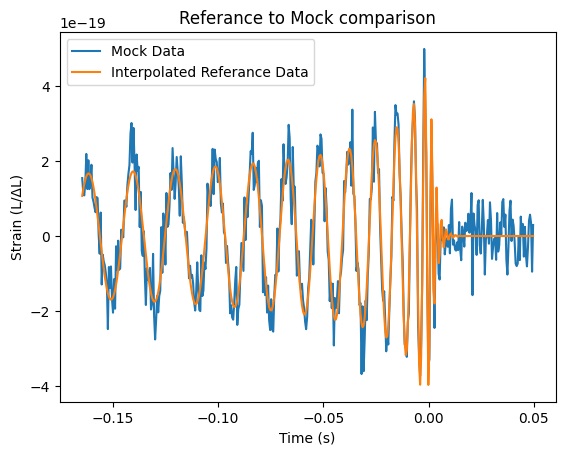

In [52]:
plt.plot(mock40M1D['time (s)'], mock40M1D['strain'],label="Mock Data")
plt.plot(mock40M1D['time (s)'],interp_strain, label = "Interpolated Referance Data")
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Referance to Mock comparison')
plt.legend()


Root mean square error to see how well this fits.. can't trust a by-eye.

RMSE was chosen over chi squared as we have not evaulated the noise for the mock data and, from the perspective of this being coursework, I wanted to show other (if related) techniques.

The lower the error between data sets the greater the agreement.

In [53]:
rmse = np.sqrt(np.mean((mock40M1D['strain'] - interp_strain)**2))
print(f"RMSE: {rmse:.3e}")

RMSE: 5.355e-20


With the error value provided by the RMSE being at least an order of magnitude under our strain values I am happy to accept this as a good fit.

***

## Part D - Using model waveforms to estimate the total mass and distance to the system "a by-eye estimate") [24 marks]

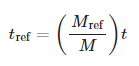

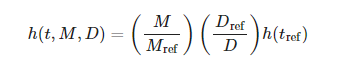

PART **D.1**

I have cut the 2 equations given in the week 8 notebook to help guide me in the construction of a function that will scale any wave to the mass and distance values taken, and interpoltae it match the recievied time array.

I will read the file for the referance wave again in the function, to keep everthing internal.

The first thing is to 'invert' the time scaling equation as we have the $t_{ref}$ and want t

$t_{ref}(\frac{M}{M_{ref}}) = t $

**Answer**

In [54]:
def waveScaling(M,D,times):
  '''using the 40M and 1Mpc ReferanceWave, scale by given Mass and Distance
  return scaledRefWave['time'] scaledRefWave['strain']'''
  #Prepare the data
  refWave = pd.read_csv('/content/reference_waveform_40Msun_1Mpc.csv')
  scaledRefWave = refWave.copy() #This extra line was auto suggested to me and I thought it was a good idea

  #Sacle with maths
  timeScale = M/40 #reverse from notes as we're working on tref not t
  strainScale = (M/40) * (1/D)
  scaledRefWave['time (s)'] = refWave['time (s)'] * timeScale
  scaledRefWave['strain'] = refWave['strain'] * strainScale

  #Interpolate to match needed timestamps
  interp_fn = interp1d(scaledRefWave['time (s)'],scaledRefWave['strain'],bounds_error=False)
  interp_strain = interp_fn(times)

  return times, interp_strain


As suggested in part **D.2** we will test the sacling function with the 70 solar mass mock data.

First we muct load the data and check its validity in the usual way (print headers and plot)

         strain  time (s)
0 -1.934524e-20 -0.164658
1 -4.436423e-20 -0.164170
2 -4.776572e-20 -0.163681
3 -4.637995e-20 -0.163193
4 -6.529435e-20 -0.162704


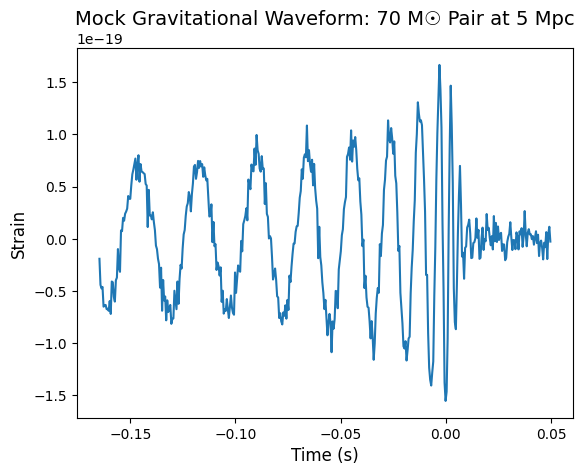

In [55]:
mock70M5D = pd.read_csv('/content/mockdata_waveform_70Msun_5Mpc.csv')
print(mock70M5D.head())

plt.plot(mock70M5D['time (s)'], mock70M5D['strain'])
plt.title('Mock Gravitational Waveform: 70 M☉ Pair at 5 Mpc', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Strain', fontsize=12)
plt.show()


With the data checked we can now send the expected Values of 70 solar masses and 5Mpc to the scaling function

In [56]:
'''test function with the 70M and 5Mpc Values
in pandas for consistancy'''
time70M5D, strain70M5D = waveScaling(70,5,mock70M5D['time (s)'])
scaled70M5D = pd.DataFrame({'time': time70M5D, 'strain': strain70M5D})
print(scaled70M5D.head())

       time        strain
0 -0.164658 -5.300246e-20
1 -0.164170 -5.651048e-20
2 -0.163681 -5.979221e-20
3 -0.163193 -6.220414e-20
4 -0.162704 -6.423488e-20


This has given us a new wave, from the referance wave, that has been scaled to the required values.. lets plot and see that the time range is correct

Text(0, 0.5, 'Strain (L/ΔL)')

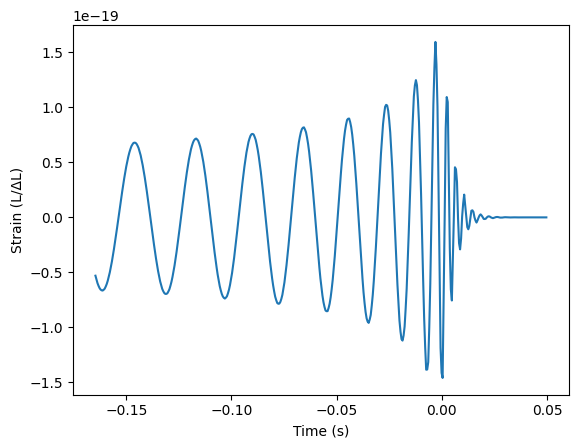

In [57]:
plt.plot(scaled70M5D['time'],scaled70M5D['strain'])
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')


As everything appears to be fine with the data we, can overlay both this scaled referance wave and the mock data to compare results


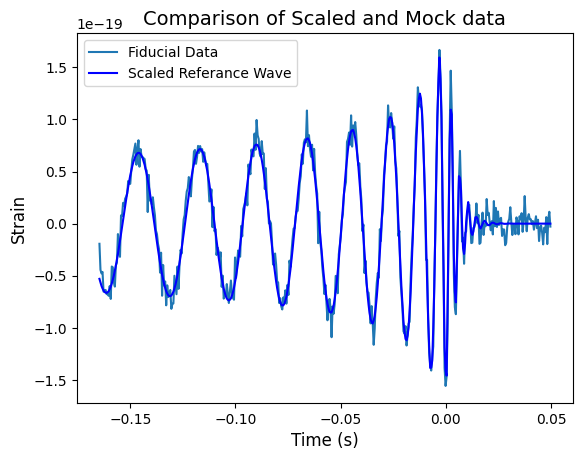

In [58]:
plt.plot(mock70M5D['time (s)'], mock70M5D['strain'], label ="Fiducial Data")
plt.plot(scaled70M5D['time'], scaled70M5D['strain'],"b",label ="Scaled Referance Wave")
plt.title('Comparison of Scaled and Mock data', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Strain', fontsize=12)
plt.legend()
plt.show()

In [59]:
rmse70 = np.sqrt(np.mean((mock70M5D['strain'] - scaled70M5D['strain'])**2))
print(f"RMSE: {rmse70:.3e}")

RMSE: 1.038e-20


To comment on this result: I once again perfromed a RSME and a received a similar RSME result as the unscaled referance wave with the matching 40 solar mass mock data. We can say that we fail to reject this match.
The main source of extra noise is almost certainly coming from the post ringdown segment of the wave and some variance in the peaks of the strain.



---



Part **D.3**
To make a "By-eye" estimate of the masses and distance of the merge event, I took inspiration from the animation provided by Chris North. By starting with a large mass and distance we can scale the "phase" of the waves by lowing the mass of the system and making the peaks line up. Then scale the amplitude by moving the distance of the event from the detector.

For upper bounds on Mass I looked at the LIGO-Virgo collaboration data and found the largest detected merger in observation run 1 to be ~160 Solar Masses. As an upper bound of the distance I took the radius of the observable universe ~4000Mpc.

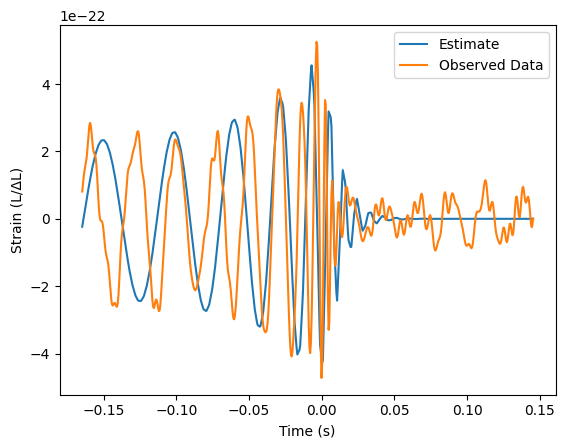

In [60]:
timeUpper, strainUpper = waveScaling(160,4000,ObsGravWav['mergeTime'])


plt.plot(timeUpper,strainUpper,label="Estimate")
plt.plot(ObsGravWav['mergeTime'],ObsGravWav['strain'], label ="Observed Data")
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.legend()
plt.show()

Looking at the graph we can see that the blue estimate is a much lower frequencey wave.. corrosponding to the longer orbit time that 2 larger black holes would have in their final moments compared to a smaller black hole pair. The 2 larger black hole event horizons would have to physcially overlap to get an orbit closer.. So we need to lower the mass of the system.

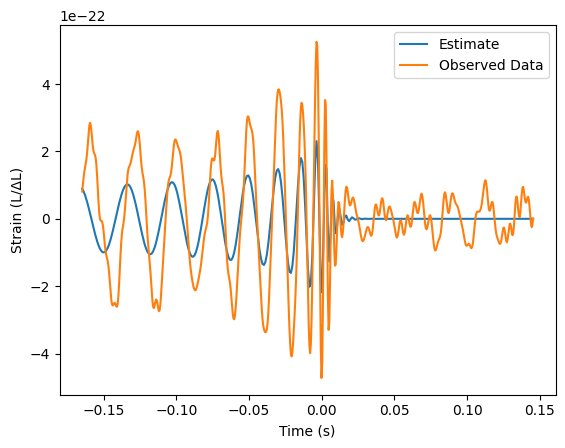

In [61]:
timeMassMove, strainMassMove = waveScaling(80,4000,ObsGravWav['mergeTime'])


plt.plot(timeMassMove,strainMassMove,label="Estimate")
plt.plot(ObsGravWav['mergeTime'],ObsGravWav['strain'], label ="Observed Data")
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.legend()
plt.show()

Rather than leave many code blocks showing my path to this value I asked genrative AI to make a series of plots to display my progess.


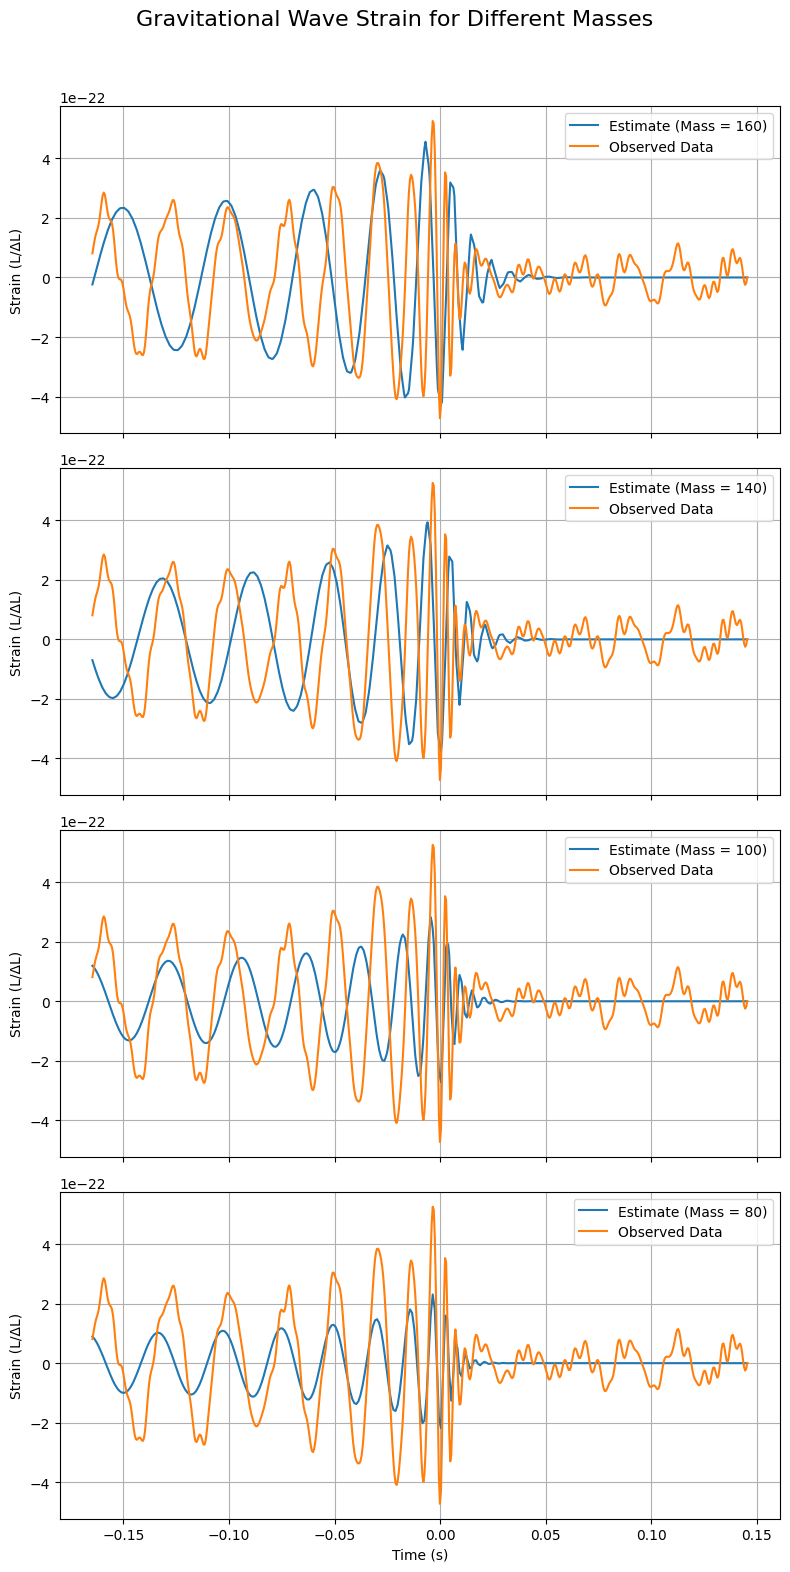

In [ ]:
'''Use chatGPt to make a series of subplots showing all the steps I took to arrive at the above plot'''
# Masses to iterate over
masses = [160, 140, 100, 80]

# Create subplots: one for each mass
fig, axs = plt.subplots(len(masses), 1, figsize=(8, len(masses) * 4), sharex=True)
fig.suptitle("Gravitational Wave Strain for Different Masses", fontsize=16)

# Loop through each mass, compute, and plot
for i, mass in enumerate(masses):
    timeMassMove, strainMassMove = waveScaling(mass, 4000, ObsGravWav['mergeTime'])

    # Plot on the respective subplot
    axs[i].plot(timeMassMove, strainMassMove, label=f"Estimate (Mass = {mass})")
    axs[i].plot(ObsGravWav['mergeTime'], ObsGravWav['strain'], label="Observed Data")

    axs[i].set_ylabel('Strain (L/ΔL)')
    axs[i].legend()
    axs[i].grid(True)

# Add shared x-label and adjust layout
plt.xlabel('Time (s)')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()


In a few steps with masses of 160, 140, 100, 80 solar masses we can see the 2 shapes begin to converge. In personal time I fiddeled with it to find a "best by eye fit" of 77 solar masses.

The same tactic could now be used to narrow in on a likly distance parameter.

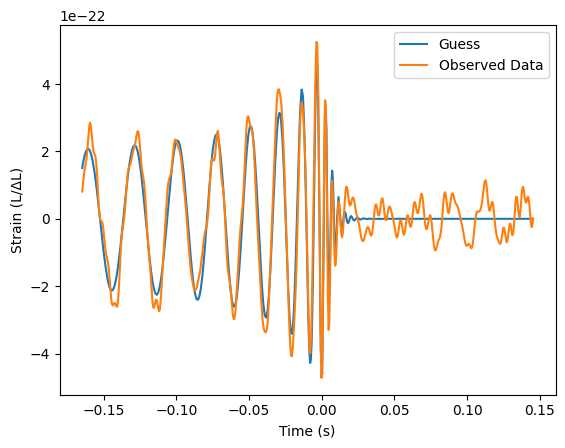

In [ ]:
time, strain = waveScaling(77,1800,ObsGravWav['mergeTime'])


plt.plot(time,strain,label="Guess")
plt.plot(ObsGravWav['mergeTime'],ObsGravWav['strain'], label ="Observed Data")
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.legend()
plt.show()

Having now performed this matching manually (following the brillant gif from Chris North) we have achieved a great by-eye fit and feel confident coding a similar process.

RESULTS: MASS 77solar mass and 1800Mpc DISTANCE

***

## Part E - Estimating the total mass using MCMC [75 marks]

To use a Monty Carlos Markov Chain on this problem, I will be using the Metropolis-Hastings Algorithm.

We start with the inital conditions M, D, and add a small value to each, drawn from a normal distribution.

We then calculate the 'liklihood' of this set of parameters with a chi squared test.
The likleyhood multiplied with the prior is proportional to the postiour, and if our new postiour is higher than the last we keep it.
If it is lower we take a raio of newPostiour to lastPostiour, if that number is more or equal to a random number between 0 and 1 we still acept the new values. If not we retain the old values. In either outcome we then start the process over.
In this case the prior is assumed to be a gausian.

$P(data|M,D) ∝ \exp(-\frac{χ^2(M,D)}{2}) $

where

$χ^2(M,D) = ∑\frac{(Strain_{a,i}-Strain_{b,i})^2}{σ^2}$

In [ ]:
'''chi squared = sum ((model[i]-referance[i])^2/stdDev^2) '''
def chiSqr(x,y,sigma):
  residual = (x - y)**2
  return (residual / (sigma ** 2)).sum()

'''liklihood is proportional to exp{-Chi/2}'''
# def liklihood(x,y,sigma):
#   return np.exp(-(chiSqr(x,y,sigma))/2)

#commented to make a log version
def liklihood(x,y,sigma):
  return -(chiSqr(x, y, sigma)) / 2


#can probably be combined into single liklihood function



def preturb(initialConditions,sigmas):
  pertubations = [np.random.normal(0,sigmas[0]),np.random.normal(0,sigmas[1])]
  return initialConditions + pertubations



I have also included the function needed to add small pertubations to our initial conditions. This is how the Metropolis-Hastings algorithum explores the outcome space, by chaning the variables in small gaussian jumps.

The next code block was the one in which I laid out the steps of the MCMC without running a loop, recorded her for as fosil evidence of work.

The steps were


1.   Make a scaled wave of the currently accepted conditions
2.   calculate the Likelihood value when compared to the observed wave
3.   Preturb the current conditions to make a set of proposed conditions
4.   Make scaled wave for preturbed conditions
5.   Calculate Likelihood for pretubed conditions
6.   Calculate the acceptance ratio, smaller the number the better the new fit is.
7.   Accept if small number

While transcribing this process to the looping version i realised my mistake with the acceptance process and updated to the correct current version seen there.







In [ ]:
initialConditions = [70,1500]
preturbSigmas = [5,100]

def preturb(initialConditions,sigmas):
  pertubations = [np.random.normal(0,sigmas[0]),np.random.normal(0,sigmas[1])]
  return initialConditions + pertubations

currentConditions = initialConditions.copy() #helps with my logic, we will be comparing to curent at the end of each loop



'''loop'''
currentWave = waveScaling(currentConditions[0],currentConditions[1],ObsGravWav['mergeTime']) #reminder that ObsGravWav['mergeTime'] acts as master clock

currentLiklihood = liklihood(currentWave[1],ObsGravWav['strain'],noiseStd) #noise from all the way back in part B, Taken as constant over time period

print(currentLiklihood)

proposedConditions = preturb(currentConditions,preturbSigmas)

proposedWave = waveScaling(proposedConditions[0],proposedConditions[1],ObsGravWav['mergeTime'])

proposedLiklihood = liklihood(proposedWave[1],ObsGravWav['strain'],noiseStd)

acceptanceRatio = proposedLiklihood - currentLiklihood

if acceptanceRatio > 1:
  currentConditions = proposedConditions
else:
  currentConditions = initialConditions

After some experimentation I ended up chosing 0.1 and 10 as the sigmas for jump size selection. This was after using [10,100] and [0.0001,0.01] and seeing that the larger value jumped to far back and forth and the small values converged on the mass but the distance did not even after 20,000 itterations.

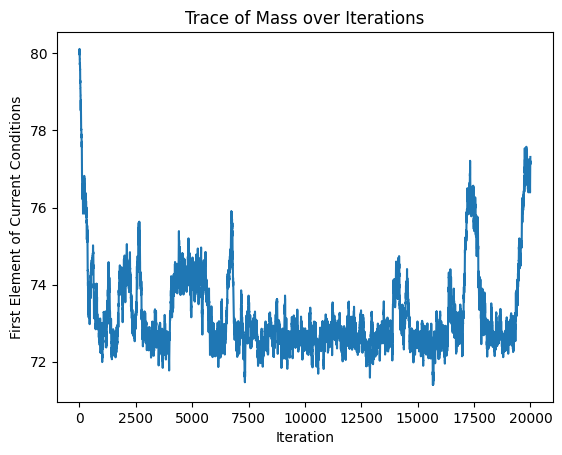

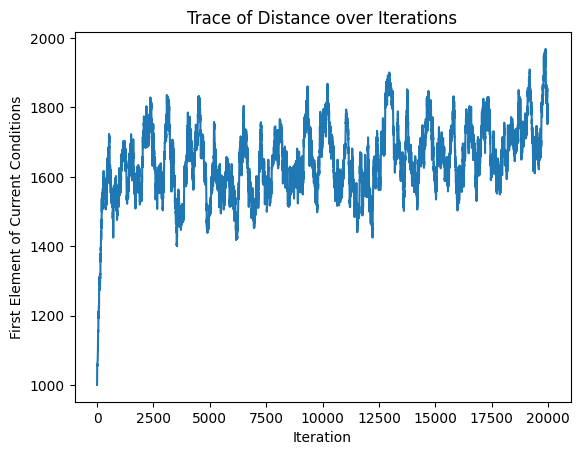

In [ ]:
preturbSigmas = [0.1,10]
bigN = int(2e4)
initialConditions = [80,1000]
traceArrayCurrent = []
traceArrayPerturbed = []
currentConditions = initialConditions.copy() #helps with my logic, we will be comparing to curent at the end of each loop

for N in range(bigN):
  '''loop: First find the "Current" fit'''
  currentWave = waveScaling(currentConditions[0],currentConditions[1],trimmedObsWav['mergeTime']) #interps ref to matched trimobs
  currentLiklihood = liklihood(currentWave[1],trimmedObsWav['strain'],noiseStd) #noise from all the way back in part B, Taken as constant over time period

  '''Now fit for proposed values'''
  proposedConditions = preturb(currentConditions,preturbSigmas)
  traceArrayPerturbed.append(proposedConditions)
  proposedWave = waveScaling(proposedConditions[0],proposedConditions[1],trimmedObsWav['mergeTime'])
  proposedLiklihood = liklihood(proposedWave[1],trimmedObsWav['strain'],noiseStd)

  acceptanceRatio = proposedLiklihood - currentLiklihood

  if acceptanceRatio > 1:
    currentConditions = proposedConditions
  elif np.random.rand() < np.exp(acceptanceRatio):
    currentConditions = proposedConditions

  traceArrayCurrent.append(currentConditions)

plt.plot(range(bigN), [item[0] for item in traceArrayCurrent])
plt.xlabel("Iteration")
plt.ylabel("Mass [M⊙]")
plt.title("Trace of Mass over Iterations")
plt.show()
plt.figure()
plt.plot(range(bigN), [item[1] for item in traceArrayCurrent])
plt.xlabel("Iteration")
plt.ylabel("Distance [Mpc]")
plt.title("Trace of Distance over Iterations")
plt.show()

To be sure that we had not fallen into a local minimum I ran 2 more MCMC with diffrent initial conditions one starting at our previously derived maximums of 150 solar masses and 4000Mpc, and the other was with minimums of 1 solar mass and 1Mpc. Both 1's are unphysical, but act as a first guess on a lower bound.

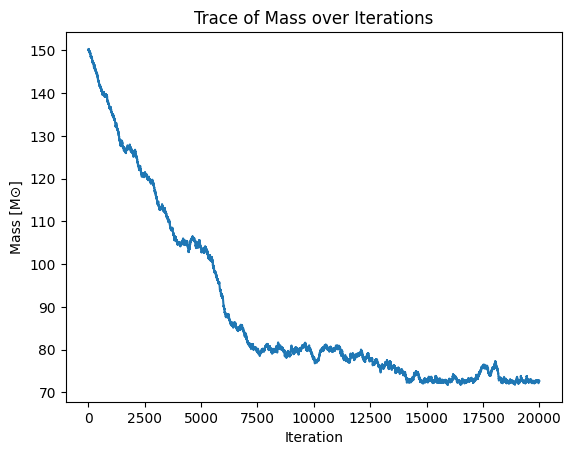

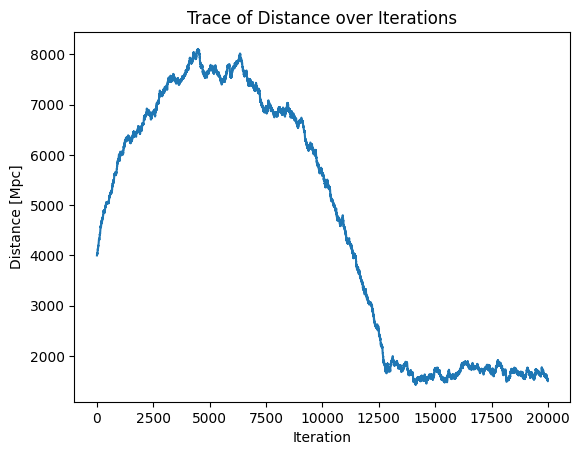

In [ ]:
bigN = int(2e4)
initialConditions = [150,4000]
traceArrayCurrent = []
traceArrayPerturbed = []
currentConditions = initialConditions.copy() #helps with my logic, we will be comparing to curent at the end of each loop

for N in range(bigN):
  '''loop: First find the "Current" fit'''
  currentWave = waveScaling(currentConditions[0],currentConditions[1],trimmedObsWav['mergeTime']) #interps ref to matched trimobs
  currentLiklihood = liklihood(currentWave[1],trimmedObsWav['strain'],noiseStd) #noise from all the way back in part B, Taken as constant over time period

  '''Now fit for proposed values'''
  proposedConditions = preturb(currentConditions,preturbSigmas)
  traceArrayPerturbed.append(proposedConditions)
  proposedWave = waveScaling(proposedConditions[0],proposedConditions[1],trimmedObsWav['mergeTime'])
  proposedLiklihood = liklihood(proposedWave[1],trimmedObsWav['strain'],noiseStd)

  acceptanceRatio = proposedLiklihood - currentLiklihood

  if acceptanceRatio > 1:
    currentConditions = proposedConditions
  elif np.random.rand() < np.exp(acceptanceRatio):
    currentConditions = proposedConditions

  traceArrayCurrent.append(currentConditions)

plt.plot(range(bigN), [item[0] for item in traceArrayCurrent])
plt.xlabel("Iteration")
plt.ylabel("Mass [M⊙]")
plt.title("Trace of Mass over Iterations")
plt.show()
plt.figure()
plt.plot(range(bigN), [item[1] for item in traceArrayCurrent])
plt.xlabel("Iteration")
plt.ylabel("Distance [Mpc]")
plt.title("Trace of Distance over Iterations")
plt.show()

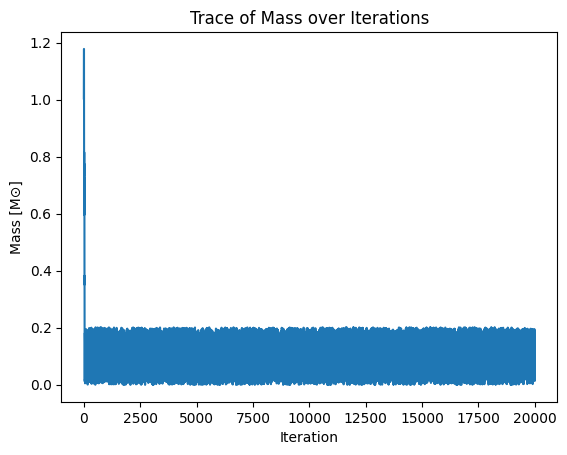

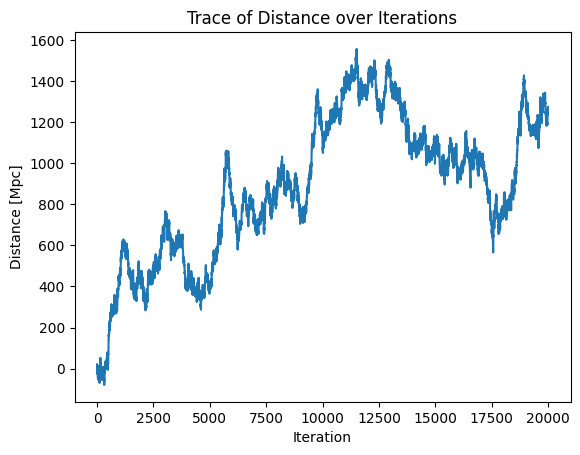

In [ ]:
bigN = int(2e4)
initialConditions = [1,1]
traceArrayCurrent = []
traceArrayPerturbed = []
currentConditions = initialConditions.copy() #helps with my logic, we will be comparing to curent at the end of each loop

for N in range(bigN):
  '''loop: First find the "Current" fit'''
  currentWave = waveScaling(currentConditions[0],currentConditions[1],trimmedObsWav['mergeTime']) #interps ref to matched trimobs
  currentLiklihood = liklihood(currentWave[1],trimmedObsWav['strain'],noiseStd) #noise from all the way back in part B, Taken as constant over time period

  '''Now fit for proposed values'''
  proposedConditions = preturb(currentConditions,preturbSigmas)
  traceArrayPerturbed.append(proposedConditions)
  proposedWave = waveScaling(proposedConditions[0],proposedConditions[1],trimmedObsWav['mergeTime'])
  proposedLiklihood = liklihood(proposedWave[1],trimmedObsWav['strain'],noiseStd)

  acceptanceRatio = proposedLiklihood - currentLiklihood

  if acceptanceRatio > 1:
    currentConditions = proposedConditions
  elif np.random.rand() < np.exp(acceptanceRatio):
    currentConditions = proposedConditions

  traceArrayCurrent.append(currentConditions)

plt.plot(range(bigN), [item[0] for item in traceArrayCurrent])
plt.xlabel("Iteration")
plt.ylabel("Mass [M⊙]")
plt.title("Trace of Mass over Iterations")
plt.show()
plt.figure()
plt.plot(range(bigN), [item[1] for item in traceArrayCurrent])
plt.xlabel("Iteration")
plt.ylabel("Distance [Mpc]")
plt.title("Trace of Distance over Iterations")
plt.show()

Your answer here

***

## Part F - Putting it all together [36 marks]

**Answer:**

Your answer here

***

## Evidence of Understanding, Presentation and Interpretation [20 marks]

An additional 20 marks will be awarded for evidence of understanding and knowledge via (for example) explanations, plots, comments on your results and well formatted and well explained results. Marks are also available for additional investigations carried out on your analysis above. These marks are available for those data analysis reports that show evidence of work that is *very high quality* or *outstanding* as per the decile descriptions in the Assessment Criteria for modules. <div align="right">**[20 marks]**</div>